# Contents:
01. Import Libraries
02. Import Data
06. Customer Profile
    - Segmentation by Age
    - Segmentation by Income
    - Segmentation by Marital Status & Number of Dependants
    - Segmentation by Department ID
07. Visualization of Profiles Distribution
    - Customer Profiles by Age
    - Customer Profiles by Income
    - Customer Profiles by Marital Status & Number of Dependants
    - Customer Profiles by Department ID
08. Aggregation Max, Mean, and Min Variables for Usage Frequency and Expenditure 
    - Segmentation by Age
    - Segmentation by Income
    - Segmentation by Marital Status & Number of Dependants
    - Segmentation by Department ID
09. Customer Profiles by Regions and Departments
    - Age-based Segmentation Profile
        - Age Profiles by Region 
        - Age Profiles by Department
    - Income-based Segmentation Profile
        - Income Profiles by Region 
        - Income Profiles by Department
    - Family Status-based Segmentation Profile
        - Family Profiles by Region 
        - Family Profiles by Department
    - Department based Segmentation Profile
        - Department Profiles by Region 
        - Department Profiles by Department

# 01. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [5]:
# define path
path = r'/Users/lavinia/Documents/04-2020 Instacart Basket Analysis'

In [6]:
# import project_file that excludes low-activities customer
df_project_excl = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_file_excllowactcust.pkl'))

In [7]:
# import department file
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'df_dep_wrangled.csv'), index_col = False)

# 06. Customer Profile

### Segmentation by Age

In [8]:
# display the dimension of the df_project_excl
df_project_excl.shape

(30964564, 33)

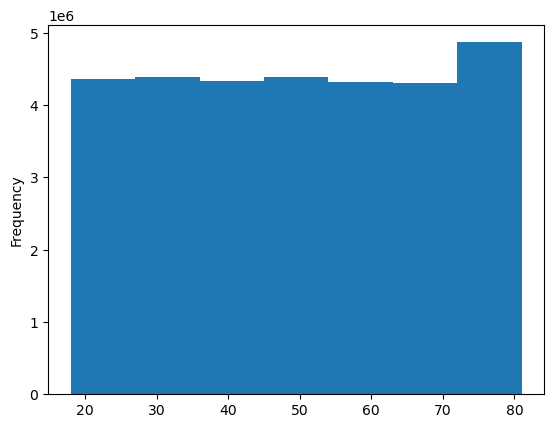

In [9]:
# create histogram to understand the age distribution
hist_age = df_project_excl['Age'].plot.hist(bins=7)

In [10]:
# create age_flag for age group classification : "Young Adults" (18-35), "Middle-aged Adults" (36-55), "Senior Adults" (>56)
df_project_excl.loc[df_project_excl['Age'] <= 35, 'age_flag'] = 'Young Adults'
df_project_excl.loc[(df_project_excl['Age'] > 35) & (df_project_excl['Age'] < 56), 'age_flag'] = 'Middle-aged Adults'
df_project_excl.loc[df_project_excl['Age'] >= 56, 'age_flag'] = 'Senior Adults'

In [11]:
# count the frequency for each age group category
df_project_excl['age_flag'].value_counts(dropna = False)

Senior Adults         12508298
Middle-aged Adults     9717461
Young Adults           8738805
Name: age_flag, dtype: int64

In [12]:
# count the total frequency
df_project_excl['age_flag'].value_counts().sum()

30964564

### Segmentation by Income

In [13]:
# perform descriptive statistics for income variable
df_project_excl['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

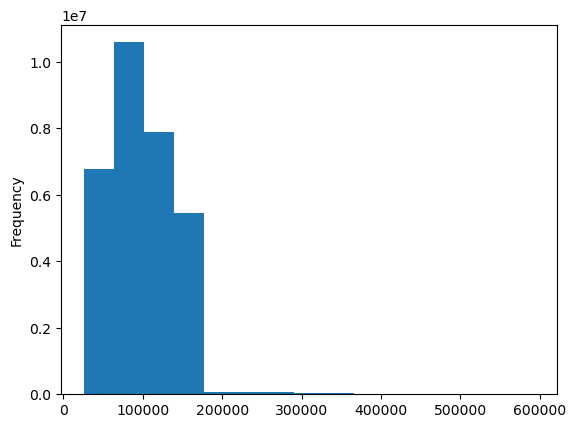

In [14]:
# create the histogram to understand the income distribution
hist_inc = df_project_excl['income'].plot.hist(bins = 15)

In [15]:
# create income_flag for income group classification : "Low-income" (<35k), "Moderate-income" (35-75k), "High-income" (75-180k), "Affluent-income" (>=180k)
df_project_excl.loc[df_project_excl['income'] < 35000, 'income_flag'] = 'Low-income'
df_project_excl.loc[(df_project_excl['income'] >= 35000) & (df_project_excl['income'] < 75000), 'income_flag'] = 'Moderate-income'
df_project_excl.loc[(df_project_excl['income'] >= 75000) & (df_project_excl['income'] < 180000), 'income_flag'] = 'High-income'
df_project_excl.loc[df_project_excl['income'] >= 180000, 'income_flag'] = 'Affluent-income'

In [16]:
# count the frequency for each income group category
df_project_excl['income_flag'].value_counts(dropna = False)

High-income        20767000
Moderate-income     9008755
Low-income           897925
Affluent-income      290884
Name: income_flag, dtype: int64

In [17]:
# count the total frequency
df_project_excl['income_flag'].value_counts().sum()

30964564

### Segmentation by Marital Status & Number of Dependents 

In [18]:
# create a crosstab between the "marital_status" and "n_dependants"
crosstab_ms_nde = pd.crosstab(df_project_excl['marital_status'], df_project_excl['n_dependants'], dropna = False)

In [19]:
# display crosstab
crosstab_ms_nde

n_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


In [20]:
# create status_flag for each customer: 
# label customer as "Single no dependants" where ('marital_status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants == 0)
df_project_excl.loc[(df_project_excl['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_project_excl['n_dependants']==0), 'status_flag'] = 'Single no dependants'
# label customer as "Single with dependants" where ('marital_status' in (divorced/widowed, living with parents and siblings, single)) & (n_dependants >= 1)
df_project_excl.loc[(df_project_excl['marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_project_excl['n_dependants'] >=1), 'status_flag'] = 'Single with dependants'
# label customer as "Married no dependants" (assumption: 1 dependant is a spouse) where ('marital_status' == 'married') & (n_dependants == 1)
df_project_excl.loc[(df_project_excl['marital_status'] == 'married') & (df_project_excl['n_dependants'] == 1), 'status_flag'] = 'Married no dependants'
# label customer as "Married with dependants" where ('marital_status' == 'married') & (n_dependants > 1)
df_project_excl.loc[(df_project_excl['marital_status'] == 'married') & (df_project_excl['n_dependants'] > 1), 'status_flag'] = 'Married with dependants'

In [21]:
# count the frequency for each status_category
df_project_excl['status_flag'].value_counts(dropna = False)

Married with dependants    14532650
Single no dependants        7739681
Married no dependants       7211061
Single with dependants      1481172
Name: status_flag, dtype: int64

In [22]:
# count the total frequency
df_project_excl['status_flag'].value_counts().sum()

30964564

### Segmentation by Department ID

In [23]:
# view the top 5 df_dept
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
# merge the df_project_excl with df_dept
df_project_excl_merged = df_project_excl.merge(df_dept, on = 'department_id', how = 'left')

In [25]:
# to show the unique products from "missing" department 
df_project_excl_merged.loc[df_project_excl_merged['department_id']==21, 'product_name'].unique()

array(['Strained Non-Fat Strawberry Icelandic Style Skyr Yogurt',
       'Cilantro Bunch', 'Whole Grain Thin Spaghetti', ...,
       'Salted Caramel Craze Ice Cream',
       'Organic Unpasteurized Brown Rice Miso',
       'Organic Chickpea Fusilli Pasta'], dtype=object)

In [26]:
# count the number of product in each department. The reset_index is used to reset the index and assign a new column name 'count' to the count values
df_project_excl_merged.groupby(['department_id','department']).size().reset_index(name='count').sort_values(by='count', ascending = False)

,department_id,department,count
3,4,produce,9079273
15,16,dairy eggs,5177182
18,19,snacks,2766406
6,7,beverages,2571901
0,1,frozen,2121731
12,13,pantry,1782705
2,3,bakery,1120828
14,15,canned goods,1012074
19,20,deli,1003834
8,9,dry goods pasta,822136


Create customers categorization based on their purchased products:
- Household essentials buyers: 1 (frozen), 2 (other), 3 (bakery), 4 (produce), 7 (beverages), 9 (dry goods pasta), 10 (bulk), 11 (personal care), 12 (meat seafood), 13 (pantry), 14 (breakfast), 15 (canned goods), 16 (dairy eggs), 17 (household), 19 (snacks), 21 (missing)
    - Pet Owners: 8 (pets)
    - Parent with babies: 18 (babies)
    - Food Enthusiast: 5 (alcohol), 6 (international), 20 (deli)

In [27]:
# create a new dataframe to calculate the frequency of purchases from each department for each customer
df_cust_dept = df_project_excl_merged.groupby(['user_id', 'department_id', 'department']).size().reset_index(name = 'product_count')

In [28]:
# change the data type of user_id to int
df_cust_dept['user_id'] = df_cust_dept['user_id'].astype(int)

In [29]:
# group all departments under household essential buyers
household_essentials = [1, 2, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21]
pet_owners = [8]
parent_w_babies = [18]
food_enthusiast = [5, 6, 20]

df_cust_dept.loc[df_cust_dept['department_id'].isin(household_essentials), 'category'] = 'Household essentials buyers'
df_cust_dept.loc[df_cust_dept['department_id'].isin(pet_owners), 'category'] = 'Pet Owners'
df_cust_dept.loc[df_cust_dept['department_id'].isin(parent_w_babies), 'category'] = 'Parent with babies'
df_cust_dept.loc[df_cust_dept['department_id'].isin(food_enthusiast), 'category'] = 'Food enthusiast'

In [30]:
# count the number of purchased product of each user_id for each category
df_cust_category = df_cust_dept.groupby(['user_id', 'category'])['product_count'].sum().reset_index()

In [31]:
# copy the table into clipboard to paste it into excel for analysis
df_cust_category.head()

,user_id,category,product_count
0,1,Household essentials buyers,59
1,2,Food enthusiast,24
2,2,Household essentials buyers,171
3,3,Food enthusiast,2
4,3,Household essentials buyers,86


In [32]:
# group the df_cust_category by 'user_id' and aggregate 'category' as a list
# apply(list) is to apply the 'list' function to each group of categories for each user in the grouped dataframe
df_cust_group = df_cust_category.groupby('user_id')['category'].apply(list).reset_index()

In [33]:
df_cust_group.head()

,user_id,category
0,1,[Household essentials buyers]
1,2,"[Food enthusiast, Household essentials buyers]"
2,3,"[Food enthusiast, Household essentials buyers]"
3,4,"[Food enthusiast, Household essentials buyers]"
4,7,"[Food enthusiast, Household essentials buyers,..."


In [34]:
# convert the list of categories in "category" column into a single row with a comma-separated string
df_cust_group['category'] = df_cust_group['category'].apply(', '.join)

In [35]:
# count the frequency for each category
df_cust_group['category'].value_counts()

Food enthusiast, Household essentials buyers                                    91922
Household essentials buyers                                                     30240
Food enthusiast, Household essentials buyers, Parent with babies                24383
Food enthusiast, Household essentials buyers, Pet Owners                         8972
Household essentials buyers, Parent with babies                                  2877
Food enthusiast, Household essentials buyers, Parent with babies, Pet Owners     2747
Household essentials buyers, Pet Owners                                          1237
Household essentials buyers, Parent with babies, Pet Owners                       219
Food enthusiast                                                                    30
Food enthusiast, Parent with babies                                                 3
Parent with babies                                                                  1
Name: category, dtype: int64

In [36]:
# count the unique user_id in the project file
df_project_excl['user_id'].nunique()

162631

In [37]:
# convert the data type of user_id to int
df_project_excl['user_id'] = df_project_excl['user_id'].astype(int)

In [38]:
df_cust_group

,user_id,category
0,1,Household essentials buyers
1,2,"Food enthusiast, Household essentials buyers"
2,3,"Food enthusiast, Household essentials buyers"
3,4,"Food enthusiast, Household essentials buyers"
4,7,"Food enthusiast, Household essentials buyers, ..."
...,...,...
162626,206203,"Food enthusiast, Household essentials buyers"
162627,206206,"Food enthusiast, Household essentials buyers"
162628,206207,"Food enthusiast, Household essentials buyers, ..."
162629,206208,"Food enthusiast, Household essentials buyers, ..."


In [39]:
# convert the data type of user_id to int
df_project_excl_merged['user_id'] = df_project_excl_merged['user_id'].astype(int)

In [40]:
# merge the result from segmentation by department_id with the main file
df_project_excl_merged = df_project_excl_merged.merge(df_cust_group, on = 'user_id', how = 'left')

In [41]:
# rename column category to column deptcat_flag
df_project_excl_merged.rename(columns = {'category' : 'deptcat_flag'}, inplace = True)

In [42]:
# export the merged project file
df_project_excl_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_final_merged.pkl'))

# 07. Visualization of Profiles Distribution 

In [43]:
# drop duplicate 'user_id' values, keeping the first occurence
unique_customer = df_project_excl_merged.drop_duplicates(subset =['user_id'])

### Customer Profiles by Age

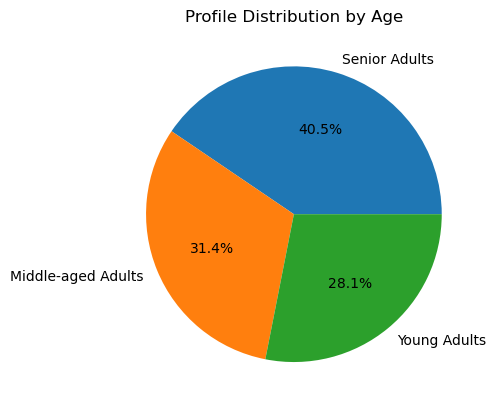

In [44]:
# create pie chart 
age_profile_pie = unique_customer['age_flag'].value_counts().plot.pie(title = 'Profile Distribution by Age', label = '', autopct='%1.1f%%' )


Categorization: Young Adults (18-35), Middle-aged Adults (36-55), Senior Adults (>56). 
Based on the chart, it appears that  majority of customers are seniors, followed by middle-aged adults, with young adults being the lowest band.

In [45]:
# export the pie chart
age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_pie.png'))

### Customer Profiles by Income

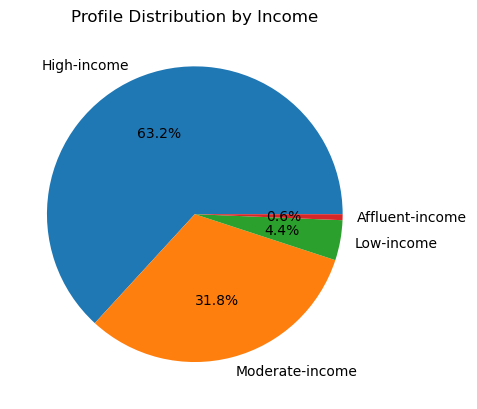

In [46]:
# create pie chart
income_profile_pie = unique_customer['income_flag'].value_counts().plot.pie(title = 'Profile Distribution by Income', label = '', autopct='%1.1f%%')

Categorization: Low-income (<35k), Moderate-income (35-75k), High-income (75-180k), Affluent-income (>=180k). The majority of Instacart customers earn between 75-180K while the least portion comes from customers who earn more than 180K.

In [47]:
# export the pie chart
income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_pie.png'))

### Customer Profiles by Marital Status & Number of Dependents

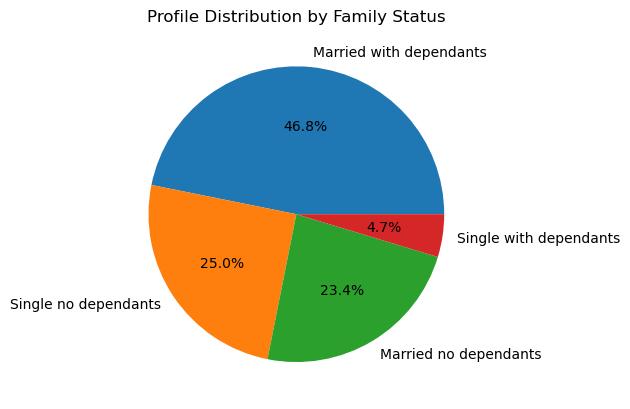

In [48]:
# create pie chart
family_profile_pie = unique_customer['status_flag'].value_counts().plot.pie(title = 'Profile Distribution by Family Status', label = '', autopct='%1.1f%%')

70.2% of Instacart's customers are married couples either without dependants or with dependants, while the rest are single adults, including divorced or widowed.

In [49]:
# export the pie chart
family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_pie.png'))

### Customer Profiles by Department ID

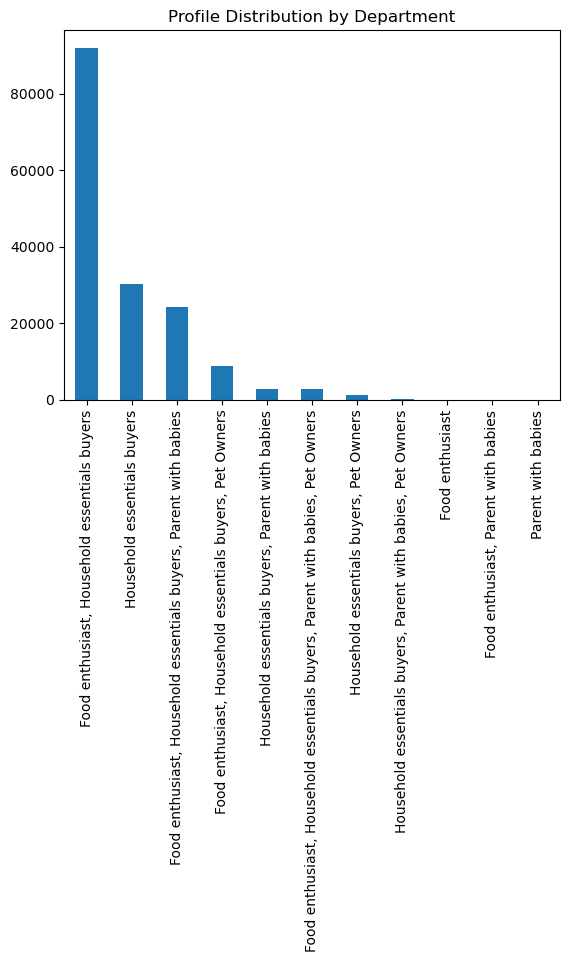

In [50]:
# create bar chart
dept_bar = unique_customer['deptcat_flag'].value_counts().plot.bar(title = 'Profile Distribution by Department')

A combination of household essentials buyers and food enthusiasts makes up the largest segment of Instacart's customer base.

In [51]:
# export the bar chart
dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar.png'))

# 08. Aggregation Max, Mean, and Min Variables for Usage Frequency and Expenditure 

### Segmentation by Age

In [52]:
# age_profile statistics
df_project_excl_merged.groupby('age_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices            \
                                      max       mean  min    max      mean   
age_flag                                                                     
Middle-aged Adults                   30.0  10.800688  0.0   25.0  7.789587   
Senior Adults                        30.0  10.804697  0.0   25.0  7.795802   
Young Adults                         30.0  10.829007  0.0   25.0  7.784246   

                         
                    min  
age_flag                 
Middle-aged Adults  1.0  
Senior Adults       1.0  
Young Adults        1.0

The usage frequency and expenditure are similar across age groups, but middle-aged shoppers tend to shop a little more frequently while seniors tend to purchase slightly more expensive products.    

### Segmentation by Income

In [53]:
# income_profile statistics
df_project_excl_merged.groupby('income_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices               
                                   max       mean  min    max      mean  min
income_flag                                                                 
Affluent-income                   30.0  10.131962  0.0   25.0  7.789078  1.0
High-income                       30.0  10.776709  0.0   25.0  7.956838  1.0
Low-income                        30.0  11.374436  0.0   25.0  6.500726  1.0
Moderate-income                   30.0  10.854022  0.0   25.0  7.536003  1.0

The low-income shoppers shops the least frequently and purchase slightly cheaper items. In terms of expenditure, high-income shopper spend slighly more than the afluent and moderate-income customers.

### Segmentation by Marital Status & Number of Dependents 

In [54]:
# marital_status statistics
df_project_excl_merged.groupby('status_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min']})

days_since_prior_order                 prices  \
                                           max       mean  min    max   
status_flag                                                             
Married no dependants                     30.0  10.814660  0.0   25.0   
Married with dependants                   30.0  10.823959  0.0   25.0   
Single no dependants                      30.0  10.791951  0.0   25.0   
Single with dependants                    30.0  10.750995  0.0   25.0   

                                        
                             mean  min  
status_flag                             
Married no dependants    7.795589  1.0  
Married with dependants  7.787643  1.0  
Single no dependants     7.789550  1.0  
Single with dependants   7.800604  1.0

"Single with dependants" customers shop most frequently and spend slightly more than their peers. "Married with dependants" customers shop the least frequently and spend slightly less than their peers.

### Segmentation by Department ID

In [55]:
# department statistics
df_project_excl_merged.groupby('deptcat_flag').agg({'days_since_prior_order':['max', 'mean', 'min'], 'prices':['max', 'mean', 'min'], 'deptcat_flag' : 'size'})

days_since_prior_order  \
                                                                      max   
deptcat_flag                                                                
Food enthusiast                                                      30.0   
Food enthusiast, Household essentials buyers                         30.0   
Food enthusiast, Household essentials buyers, P...                   30.0   
Food enthusiast, Household essentials buyers, P...                   30.0   
Food enthusiast, Household essentials buyers, P...                   30.0   
Food enthusiast, Parent with babies                                  30.0   
Household essentials buyers                                          30.0   
Household essentials buyers, Parent with babies                      30.0   
Household essentials buyers, Parent with babies...                   30.0   
Household essentials buyers, Pet Owners                              30.0   
Parent with babies                                                   30.0   

                                                                    prices  \
                                                         mean   min    max   
deptcat_flag                                                                 
Food enthusiast                                     15.130641   0.0   14.9   
Food enthusiast, Household essentials buyers        11.393260   0.0   25.0   
Food enthusiast, Household essentials buyers, P...   9.338601   0.0   25.0   
Food enthusiast, Household essentials buyers, P...   8.667407   0.0   25.0   
Food enthusiast, Household essentials buyers, P...  10.774118   0.0   25.0   
Food enthusiast, Parent with babies                 16.392857   3.0   13.8   
Household essentials buyers                         12.959555   0.0   25.0   
Household essentials buyers, Parent with babies     12.000703   0.0   25.0   
Household essentials buyers, Parent with babies...  12.701796   0.0   25.0   
Household essentials buyers, Pet Owners             13.547086   0.0   25.0   
Parent with babies                                  25.750000  13.0   10.3   

                                                                  deptcat_flag  
                                                        mean  min         size  
deptcat_flag                                                                    
Food enthusiast                                     7.842268  1.0          485  
Food enthusiast, Household essentials buyers        7.792120  1.0     16684347  
Food enthusiast, Household essentials buyers, P...  7.840875  1.0      8321866  
Food enthusiast, Household essentials buyers, P...  7.786193  1.0      1124710  
Food enthusiast, Household essentials buyers, P...  7.825095  1.0      2184613  
Food enthusiast, Parent with babies                 9.632353  2.0           34  
Household essentials buyers                         7.550515  1.0      2170858  
Household essentials buyers, Parent with babies     7.802874  1.0       335614  
Household essentials buyers, Parent with babies...  7.854766  1.0        28020  
Household essentials buyers, Pet Owners             7.796979  1.0       114008  
Parent with babies                                  8.311111  3.3            9

Among the "Household essentials" customer profiling  combination, the combination of "Household essential buyers and Pet owners" have the longest frequent usage, which means they shop the least frequently while the combination of all "Food enthusiast, Household essentials buyers, Parent with babies, Pet Owners" shop the most frequently. In terms of average spending, "Household essentials buyers" spend the least compared to the rest of "Household essentials" customer profiling combinations.

# 09. Customer Profiles by Regions and Departments

##  Age-based Segmentation Profile

### 1) Age Profiles by Region

In [56]:
# define the desired order of age_flag categories
age_order = ['Young Adults', 'Middle-aged Adults', 'Senior Adults']

In [57]:
# create a crosstab between the "Region" column and "age_flag" column
crosstab_region_age = pd.crosstab(df_project_excl_merged['Region'], df_project_excl_merged['age_flag'], normalize ='index', dropna = False).loc[:, age_order]
crosstab_region_age

age_flag,Young Adults,Middle-aged Adults,Senior Adults
Region,,,
Midwest,0.277960,0.320708,0.401332
Northeast,0.283909,0.307304,0.408786
South,0.286138,0.311533,0.402328
West,0.279859,0.314997,0.405143


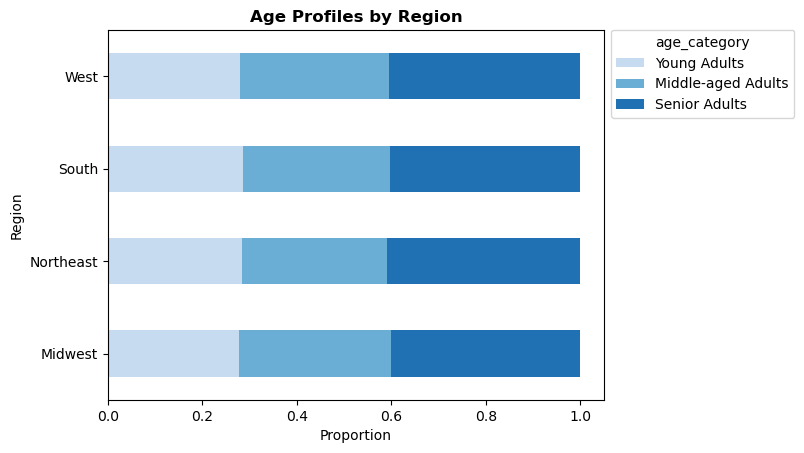

In [96]:
# create the visualization of Age Profiles by Region
region_age = crosstab_region_age.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Region')
plt.title('Age Profiles by Region', fontweight='bold')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

All regions have similar age group distributions. Across all regions, young adults make up the least proportion of the customer pools while seniors make up the most.

In [59]:
# export the viz
region_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age.png'))

### 2) Age Profiles by Department

In [121]:
# create a crosstab between the "department" column and "age_flag" column
crosstab_department_age = pd.crosstab(df_project_excl_merged['department'], df_project_excl_merged['age_flag'], normalize ='columns', dropna = False).loc[:, age_order]
crosstab_department_age

age_flag,Young Adults,Middle-aged Adults,Senior Adults
department,,,
alcohol,0.004850,0.004621,0.004584
babies,0.012984,0.013793,0.013023
bakery,0.036279,0.036170,0.036161
beverages,0.082092,0.083140,0.083673
breakfast,0.021904,0.021681,0.021485
bulk,0.001101,0.001067,0.001076
canned goods,0.032863,0.032620,0.032612
dairy eggs,0.168390,0.166864,0.166622
deli,0.032483,0.032294,0.032471


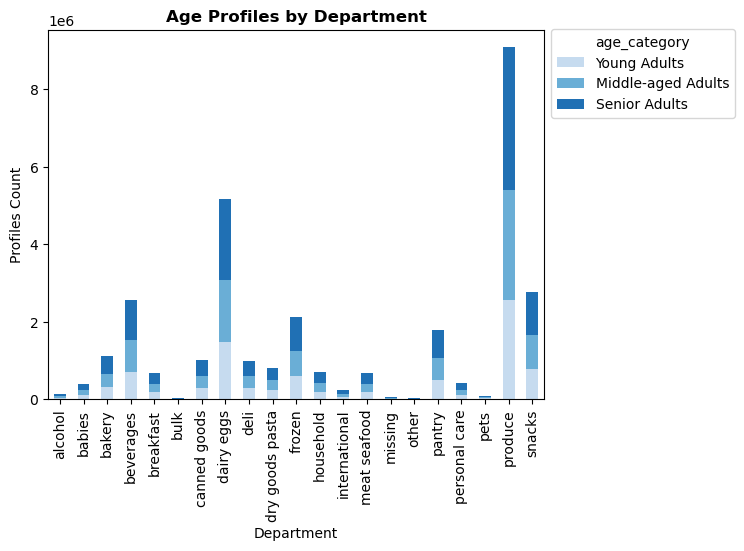

In [98]:
# create the visualization of Age Profiles by Department
department_age = crosstab_department_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues',3))

# customize the plot
plt.xlabel('Department')
plt.ylabel('Profiles Count')
plt.title('Age Profiles by Department', fontweight='bold')
plt.legend(title ='age_category', bbox_to_anchor=(1, 1.02), loc='upper left')

# Show the plot
plt.show()

Produce, dairy eggs, and snacks are the top three departments across all age groups. 

In [99]:
# export the viz
department_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_age.png'))

# Income-based Segmentation Profile

### 1) Income Profiles by Region

In [63]:
# define the desired order of income_flag
income_order = ['Low-income', 'Moderate-income', 'High-income', 'Affluent-income']

In [64]:
# create a crosstab between the "Region" column and "income_flag" column
crosstab_region_income = pd.crosstab(df_project_excl_merged['Region'], df_project_excl_merged['income_flag'], normalize = 'index', dropna = False).loc[:, income_order]
crosstab_region_income

income_flag,Low-income,Moderate-income,High-income,Affluent-income
Region,,,,
Midwest,0.029130,0.287681,0.673076,0.010113
Northeast,0.028182,0.288398,0.675126,0.008295
South,0.029185,0.292178,0.669197,0.009440
West,0.029198,0.294058,0.667310,0.009433


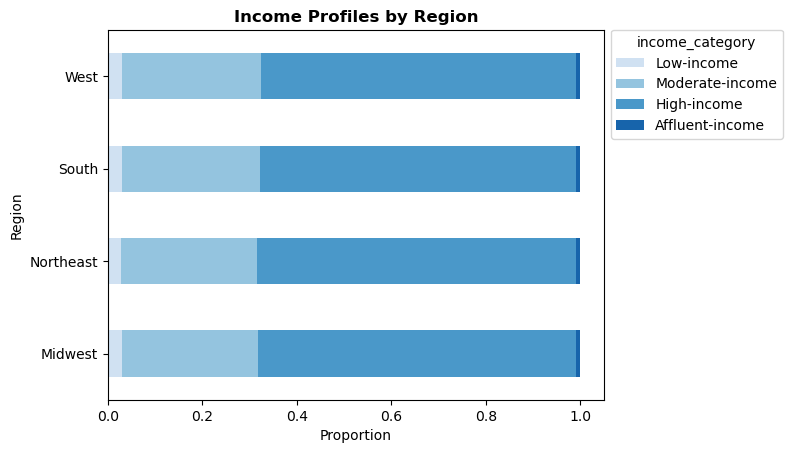

In [100]:
# create the visualization of Income Profiles by Region
region_income = crosstab_region_income.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues',len(income_order)))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Region')
plt.title('Income Profiles by Region', fontweight='bold')
plt.legend(title = 'income_category', bbox_to_anchor=(1, 1.02), loc='upper left')

#show the plot
plt.show()

Across all regions, high-income customers made up the largest proportion, while affluent-income customers made up the smallest.

In [66]:
# export the viz
region_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income.png'))

### 2) Income Profiles by Department

In [111]:
# create a crosstab between the "department" column and "income_flag" column
crosstab_department_income = pd.crosstab(df_project_excl_merged['department'], df_project_excl_merged['income_flag'], normalize = 'columns', dropna = False).loc[:, income_order]
crosstab_department_income

income_flag,Low-income,Moderate-income,High-income,Affluent-income
department,,,,
alcohol,0.005424,0.004407,0.004477,0.024346
babies,0.007370,0.012007,0.014121,0.008127
bakery,0.029964,0.034918,0.036830,0.049882
beverages,0.117652,0.089440,0.078630,0.094893
breakfast,0.028495,0.023030,0.020726,0.025374
bulk,0.001372,0.001187,0.001035,0.000096
canned goods,0.021782,0.030589,0.034023,0.035726
dairy eggs,0.144563,0.163268,0.169769,0.175152
deli,0.031695,0.032230,0.032575,0.029338


In [105]:
# copy the above table to excel
crosstab_department_income.to_clipboard()

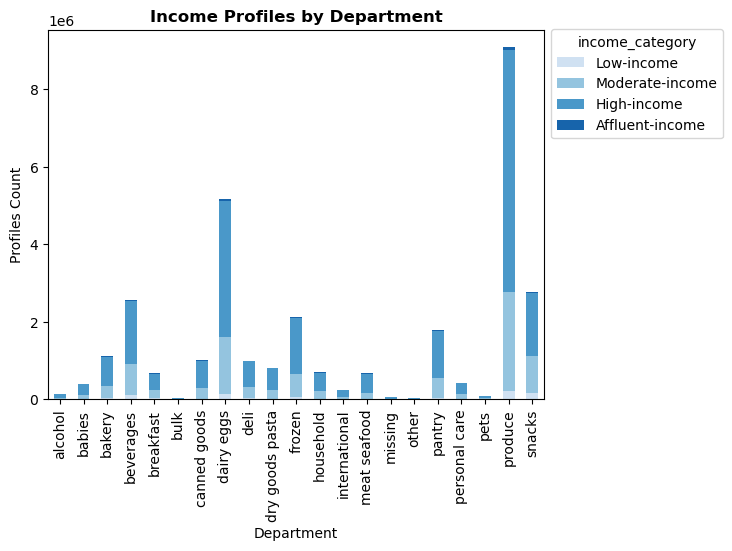

In [101]:
# create the visualization of Income Profiles by Department
department_income = crosstab_department_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', len(income_order)))

# customize the plot
plt.xlabel('Department')
plt.ylabel('Profiles Count')
plt.title('Income Profiles by Department', fontweight='bold')
plt.legend(title = 'income_category', bbox_to_anchor=(1, 1.02), loc='upper left')

#show the plot
plt.show()

Produce, dairy eggs, and snacks are the top three departments across all income profiles. As compared to other income groups, low-income customers spend more in the snack and beverage departments and less on dairy eggs. Affluent-income customers spend less on the produce department, but most on dairy eggs, frozen, pantry, bakery, household, alcohol, and pets. On the other hand, high-income customers purchase more produce while purchasing least in snacks and beverages department. 

In [102]:
# export the viz
department_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_income.png'))

# Family Status-based Segmentation Profile

### 1) Family Profiles by Region

In [70]:
# define the desired order of status_flag
status_order = ['Married with dependants', 'Married no dependants', 'Single with dependants', 'Single no dependants']

In [71]:
# create a crosstab between the "region" column and "status_flag" column
crosstab_region_family = pd.crosstab(df_project_excl_merged['Region'], df_project_excl_merged['status_flag'], normalize = 'index', dropna = False).loc[:, status_order]
crosstab_region_family

status_flag,Married with dependants,Married no dependants,Single with dependants,Single no dependants
Region,,,,
Midwest,0.463759,0.236820,0.048397,0.251024
Northeast,0.469236,0.235978,0.046925,0.247861
South,0.470834,0.229743,0.049020,0.250402
West,0.472548,0.231220,0.046403,0.249829


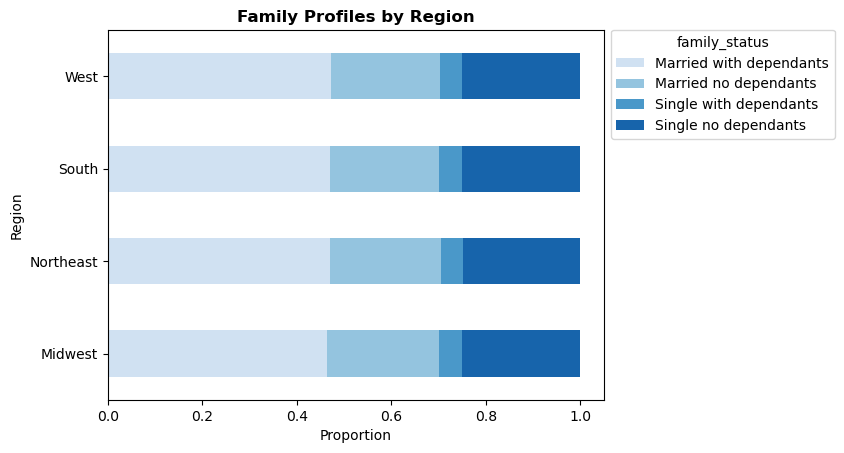

In [106]:
# create the visualization of Family Profiles by Region
region_family = crosstab_region_family.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 4))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Region')
plt.title('Family Profiles by Region', fontweight='bold')
plt.legend(title = 'family_status', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

Family status proportions are similar across all regions with "Married with dependants" customers accounting for the highest proportion and "Single with dependants" customers accounting for the lowest.

In [73]:
# export the viz
region_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_family.png'))

### 2) Family Profiles by Department

In [115]:
# create a crosstab between the "department" column and "status_flag" column
crosstab_department_family = pd.crosstab(df_project_excl_merged['department'], df_project_excl_merged['status_flag'], normalize = 'columns', dropna = False).loc[:,status_order]
crosstab_department_family

status_flag,Married with dependants,Married no dependants,Single with dependants,Single no dependants
department,,,,
alcohol,0.004553,0.004611,0.005657,0.004758
babies,0.013408,0.012874,0.013085,0.013350
bakery,0.036027,0.036358,0.036244,0.036357
beverages,0.083236,0.082903,0.080414,0.083381
breakfast,0.021556,0.021904,0.022413,0.021504
bulk,0.001082,0.001122,0.001103,0.001034
canned goods,0.032785,0.032745,0.032729,0.032433
dairy eggs,0.166622,0.167956,0.168925,0.167239
deli,0.032382,0.032137,0.032487,0.032738


In [113]:
# copy the above table to excel
crosstab_department_family.to_clipboard()

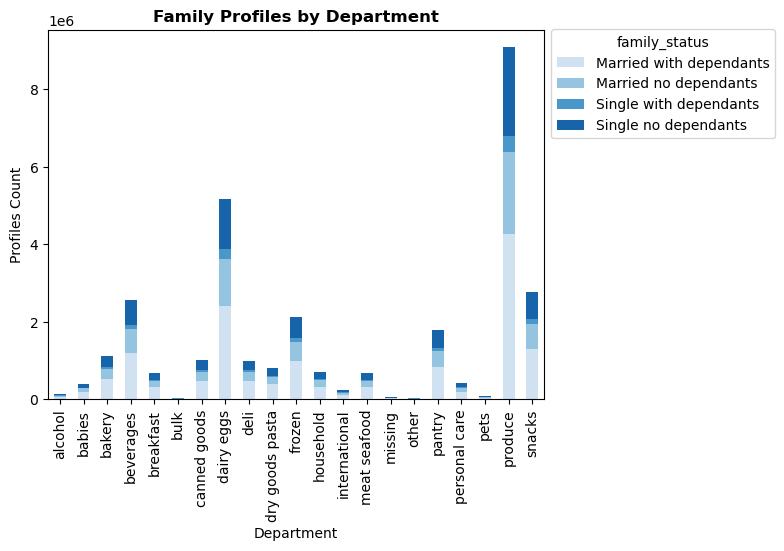

In [107]:
# create the visualization of Family Profiles by Department
department_family = crosstab_department_family.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues',4))

# customize the plot
plt.xlabel('Department')
plt.ylabel('Profiles Count')
plt.title('Family Profiles by Department', fontweight='bold')
plt.legend(title = 'family_status', bbox_to_anchor=(1, 1.02), loc='upper left')

#show the plot
plt.show()

Produce, dairy, eggs, and snacks are the top three purchased departments across all family profiles. Similar distribution are observed across all family profiles. Single with dependants spend slightly more on alcohol (0.6% of purchases vs 0.5%) and pets (0.4% of purchases vs 0.3%) than other groups.

In [108]:
# export the viz
department_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_family.png'))

# Department-based Segmentation Profile

### 1) Department Profiles by Region

In [77]:
# define the desired order of deptcatflag (desc qty count)
department_order = ['Food enthusiast, Household essentials buyers', 'Household essentials buyers', 'Food enthusiast, Household essentials buyers, Parent with babies', 'Food enthusiast, Household essentials buyers, Pet Owners','Household essentials buyers, Parent with babies', 'Food enthusiast, Household essentials buyers, Parent with babies, Pet Owners', 'Household essentials buyers, Pet Owners', 'Household essentials buyers, Parent with babies, Pet Owners', 'Food enthusiast', 'Food enthusiast, Parent with babies', 'Parent with babies']

In [78]:
# create a crosstab between the "region" column and "deptcat_flag" column
crosstab_region_department = pd.crosstab(df_project_excl_merged['Region'], df_project_excl_merged['deptcat_flag'], normalize = 'index', dropna = False).loc[:, department_order]
crosstab_region_department

deptcat_flag,"Food enthusiast, Household essentials buyers",Household essentials buyers,"Food enthusiast, Household essentials buyers, Parent with babies","Food enthusiast, Household essentials buyers, Pet Owners","Household essentials buyers, Parent with babies","Food enthusiast, Household essentials buyers, Parent with babies, Pet Owners","Household essentials buyers, Pet Owners","Household essentials buyers, Parent with babies, Pet Owners",Food enthusiast,"Food enthusiast, Parent with babies",Parent with babies
Region,,,,,,,,,,,
Midwest,0.537001,0.070147,0.268104,0.071957,0.010767,0.037584,0.003684,0.000735,0.000021,0.000000e+00,0.000000
Northeast,0.540832,0.068234,0.271242,0.067079,0.010209,0.037529,0.003768,0.001088,0.000018,0.000000e+00,0.000002
South,0.539432,0.071118,0.269921,0.068723,0.011120,0.035361,0.003534,0.000774,0.000016,4.849125e-07,0.000000
West,0.538306,0.070050,0.266118,0.074039,0.010973,0.035585,0.003813,0.001105,0.000008,3.658278e-06,0.000000


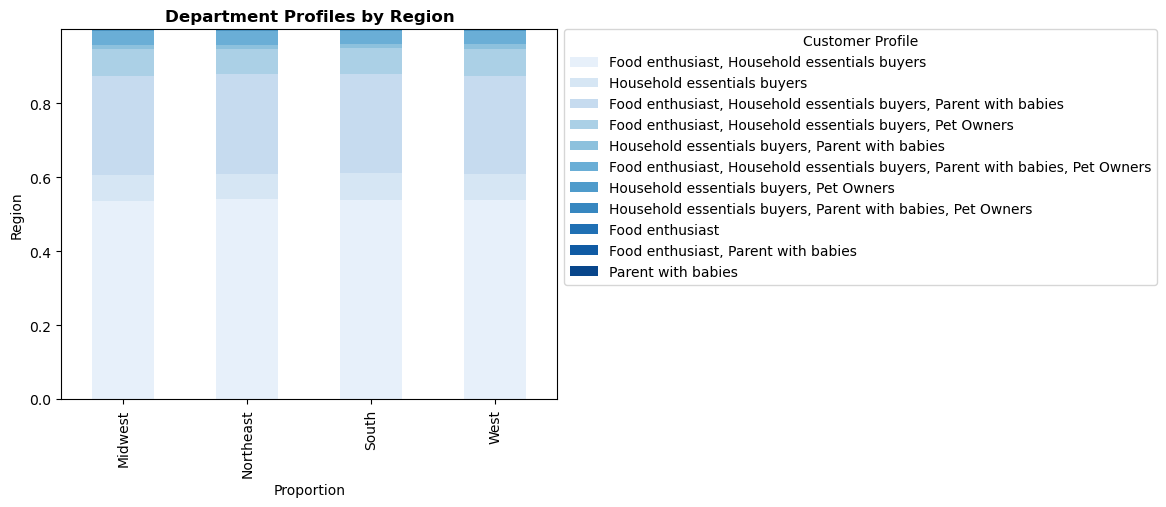

In [120]:
# create the visualization of Department Profiles by Region
region_department = crosstab_region_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 11))

# customize the plot
plt.xlabel('Proportion')
plt.ylabel('Region')
plt.title('Department Profiles by Region', fontweight='bold')
plt.legend(title = 'Customer Profile', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

Across all regions, customer profiles are distributed similarly with the combination profile of food enthusiasts and household essentials buyers has the highest proportion in each region.

In [80]:
# export the viz
region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department.png'))

### 2) Department Profiles by Department

In [118]:
# create a crosstab between the "department" column and "deptcat_flag" column
crosstab_customer_department = pd.crosstab(df_project_excl_merged['department'], df_project_excl_merged['deptcat_flag'], normalize = 'columns', dropna = False).loc[:, department_order]
crosstab_customer_department

deptcat_flag,"Food enthusiast, Household essentials buyers",Household essentials buyers,"Food enthusiast, Household essentials buyers, Parent with babies","Food enthusiast, Household essentials buyers, Pet Owners","Household essentials buyers, Parent with babies","Food enthusiast, Household essentials buyers, Parent with babies, Pet Owners","Household essentials buyers, Pet Owners","Household essentials buyers, Parent with babies, Pet Owners",Food enthusiast,"Food enthusiast, Parent with babies",Parent with babies
department,,,,,,,,,,,
alcohol,0.006126,0.000000,0.001856,0.009538,0.000000,0.005082,0.000000,0.000000,0.826804,0.500000,0.0
babies,0.000000,0.000000,0.042229,0.000000,0.069684,0.029825,0.000000,0.072163,0.000000,0.235294,1.0
bakery,0.036188,0.027481,0.037154,0.040174,0.031167,0.040267,0.034647,0.026802,0.000000,0.000000,0.0
beverages,0.084576,0.131419,0.063531,0.096004,0.081838,0.081477,0.130956,0.108958,0.000000,0.000000,0.0
breakfast,0.021285,0.026285,0.021110,0.020560,0.026408,0.022649,0.025717,0.028587,0.000000,0.000000,0.0
bulk,0.001161,0.001434,0.001040,0.000565,0.000596,0.000770,0.000167,0.000036,0.000000,0.000000,0.0
canned goods,0.033667,0.021826,0.032315,0.037034,0.024406,0.036128,0.029875,0.032905,0.000000,0.000000,0.0
dairy eggs,0.164749,0.165829,0.178351,0.149489,0.179105,0.157588,0.144560,0.136938,0.000000,0.000000,0.0
deli,0.037443,0.000000,0.032386,0.034239,0.000000,0.030878,0.000000,0.000000,0.156701,0.205882,0.0


In [119]:
# copy to excel
crosstab_customer_department.to_clipboard()

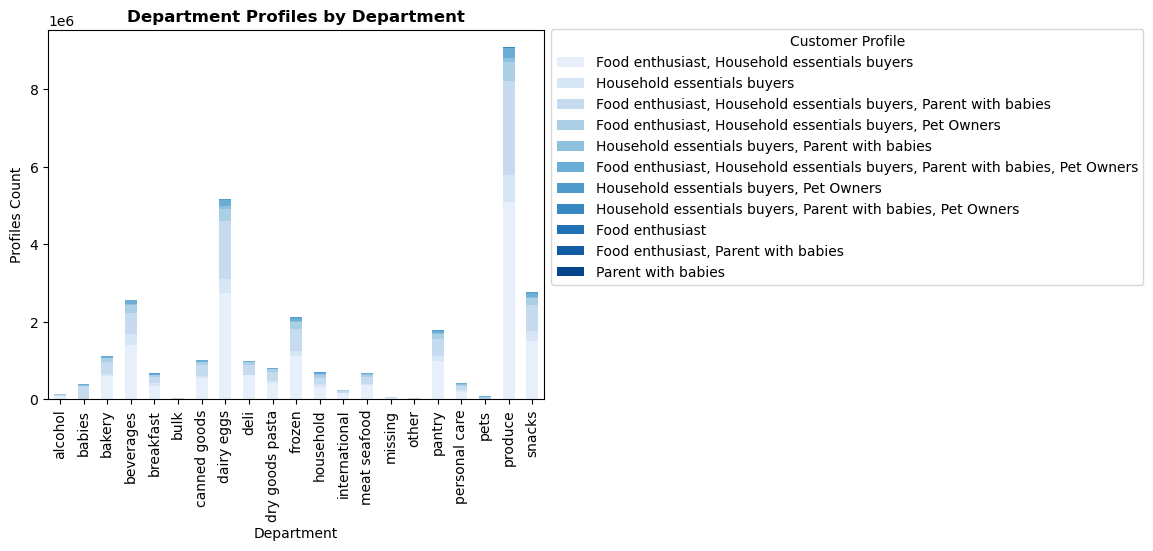

In [117]:
# create the visualization of Department Profiles by Department
customer_department = crosstab_customer_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 11))

# customize the plot
plt.xlabel('Department')
plt.ylabel('Profiles Count')
plt.title('Department Profiles by Department', fontweight='bold')
plt.legend(title = 'Customer Profile', bbox_to_anchor=(1, 1.02), loc='upper left')

# show the plot
plt.show()

A majority of Instacart's customers purchase more on produce, dairy eggs, and snacks departments. Pure household essentials buyers purchase slightly more produce and snacks than other household essentials buyer' profile combination, while food enthusiast, household essentials and parent with babies buyers purchase dairy products in greater proportions in comparison to other categories.

In [83]:
# export the viz
customer_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_department.png'))